In [1]:
import numpy as np
#import os

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

from astropy.io import fits

from setup import *
from FullFrame import FullFrame

##--------------------------------------------------------------------------##
##             NECESSARY USER INPUTS BELOW....                              ##
##--------------------------------------------------------------------------##

##################
###   WASP4b   ###
##################
#obs_date='ut20150819'                           #observation date
#obj_name='Wasp4'                                #object name   
#midtime=['2015-08-19T07:43:00.00']                 #time of midtransit, WAsp-4b

###################
###   WASP52b   ###
###################
obs_date='ut20160811'
#obs_date='ut20160922'
obj_name='Wasp52'

midtime=['2016-08-11T04:51:00']               #time of midtransit, Wasp-52b, Transit1
#midtime=['2016-09-22T04:44:00']               #time of midtransit, Wasp-52b, Transit2

##################
###   Hats8b   ###
##################
#obs_date='ut20170723'                           #observation date
#obs_date='ut20170828'
#obj_name='Hats8'                                #object name  

#midtime=['2017-07-24T05:28:01.056']                 #time of midtransit, Hats-8b, Transit 1
#midtime=['2017-08-29T01:36:04.608']                 #time of midtransit, Hats-8b Transit 2


path='/Volumes/ermay_ext/Magellan/'+obs_date+'/'
data_path=path+obj_name+'_Spec/'      #path to where your data is saved
flat_path=path+obj_name+'_Flats/'     #path to where your SLIT flats are saved
DARKS=path+obj_name+'_Darks/'     #path to where your darks are saved
FLATS=path+'Full_Flats/'             #path to where the full field flats are saved 
WAVE=path+obj_name+'_Arcs/'

#SAVEPATH='SaveData/'+obj_name+'/'
SAVEPATH=path+'SaveData_'+obj_name+'/'

wavelength_path=path+'WaveSolution/'



extray=400 #number of extra pixels to extract per side in y direction
extrax=80  #number on the side to find wavelength strip, only for nights with a single mask


binn=1    #binning
#### CHECK BINNING IN SETUP.PY ####
#### if 1x1 binning, xpixels,ypixels should be 2048,4096
#### if 2x2 binning, xpixels,ypixels should be 1024,2048
print xpixels/binn, ypixels/binn

2048 4096


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/axes/_axes.py:2818: MatplotlibDeprecationWarning: Use of None object as fmt keyword argument to suppress plotting of data values is deprecated since 1.4; use the string "none" instead.
  warnings.warn(msg, mplDeprecation, stacklevel=1)


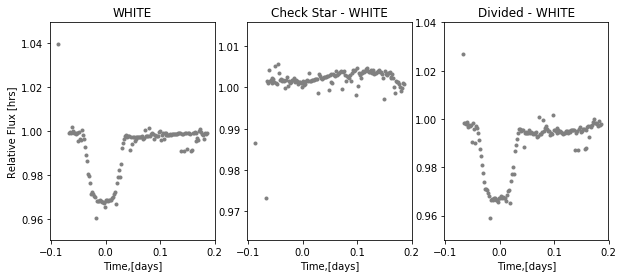

[ 4600.  4650.  4700.  4750.  4800.  4850.  4900.  4950.  5000.  5050.
  5100.  5150.  5200.  5250.  5300.  5350.  5400.  5450.  5500.  5550.
  5600.  5650.  5700.  5750.  5800.  5850.  5900.  5950.  6000.  6050.
  6100.  6150.  6200.  6250.  6300.  6350.  6400.  6450.  6500.  6550.
  6600.  6650.  6700.  6750.  6800.  6850.  6900.  6950.  7000.  7050.
  7100.  7150.  7200.  7250.  7300.  7350.  7400.  7450.  7500.  7550.
  7600.  7650.  7700.  7750.  7800.  7850.  7800.]


GenerateLC.py:206: RuntimeWarning: Mean of empty slice
  LC_l[:,b]=LC_l[:,b]/np.nanmean(LC_l[0:20,b])
GenerateLC.py:207: RuntimeWarning: Mean of empty slice
  CS_l[:,b]=CS_l[:,b]/np.nanmean(CS_l[0:20,b])
GenerateLC.py:210: RuntimeWarning: Mean of empty slice
  errs_lcd_l_t[:,b]/=np.nanmean(LC_d[0:20,b])
GenerateLC.py:211: RuntimeWarning: Mean of empty slice
  errs_lcd_l_p[:,b]/=np.nanmean(LC_d[0:20,b])
GenerateLC.py:214: RuntimeWarning: All-NaN slice encountered
  ymax_lc=np.nanmax(LC_l[:,b])
GenerateLC.py:215: RuntimeWarning: All-NaN axis encountered
  ymin_lc=np.nanmin(LC_l[:,b])
GenerateLC.py:217: RuntimeWarning: All-NaN slice encountered
  ymax_cs=np.nanmax(CS_l[:,b])
GenerateLC.py:218: RuntimeWarning: All-NaN axis encountered
  ymin_cs=np.nanmin(CS_l[:,b])


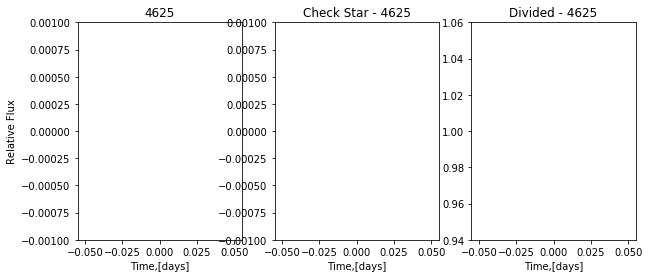

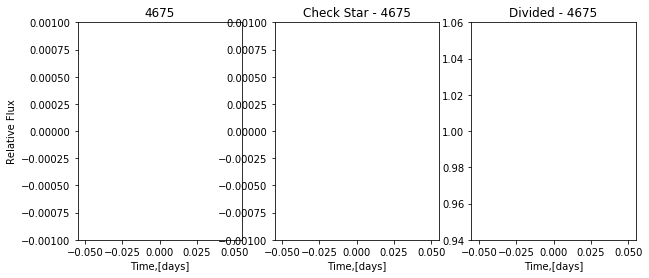

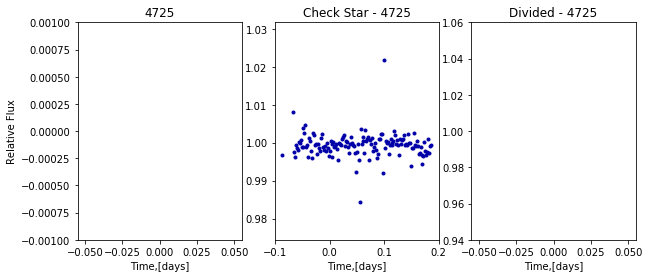

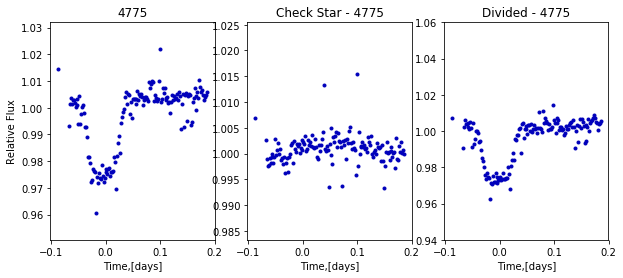

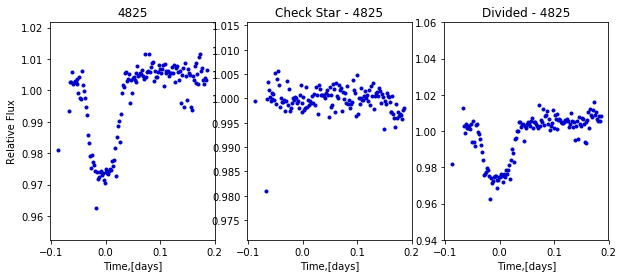

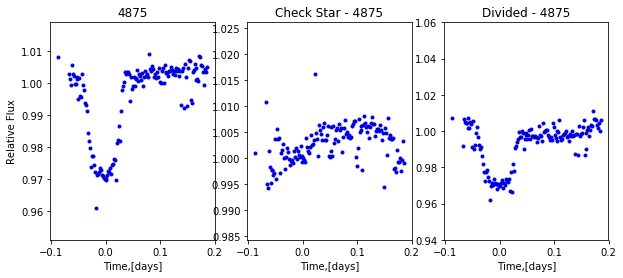

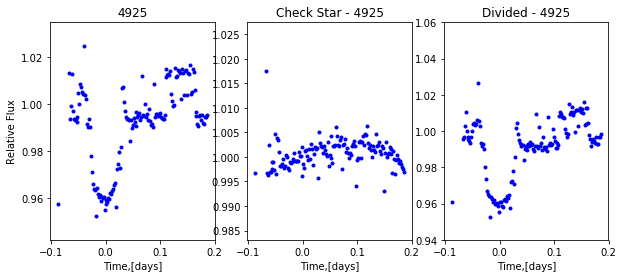

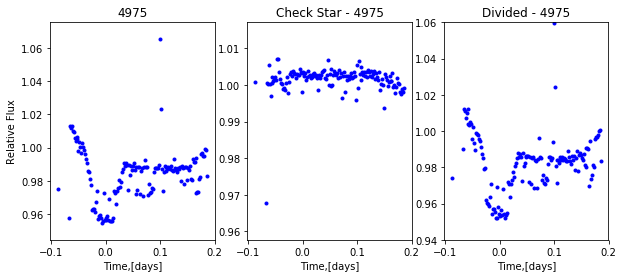

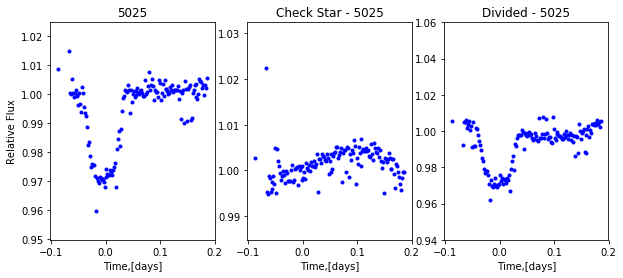

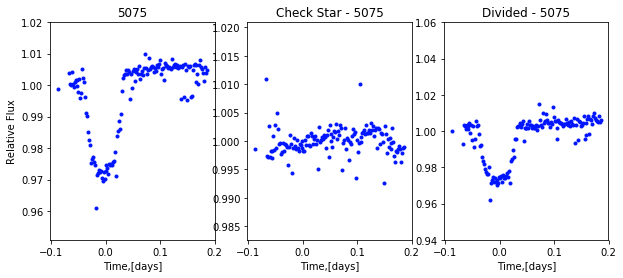

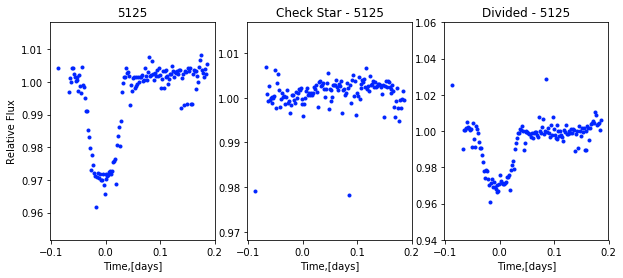

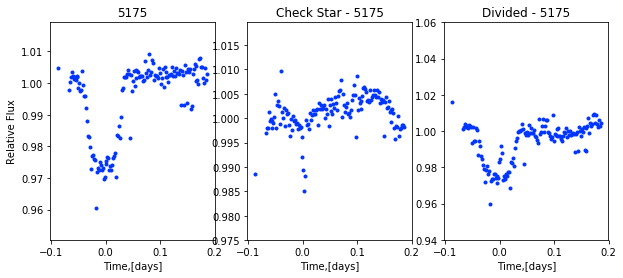

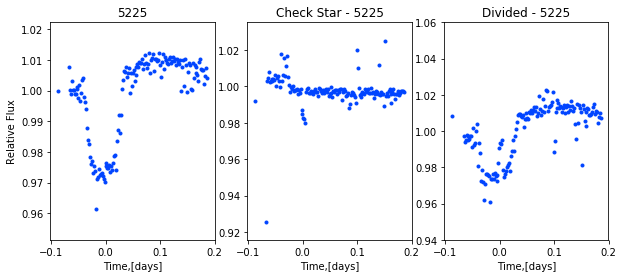

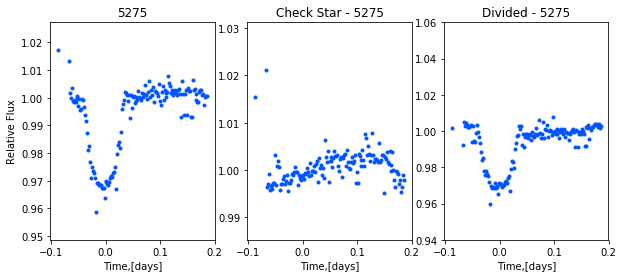

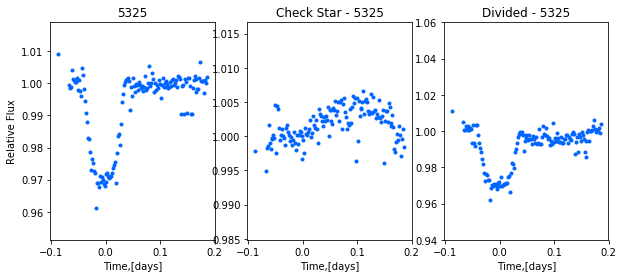

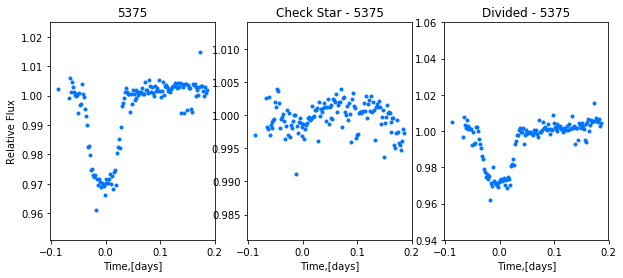

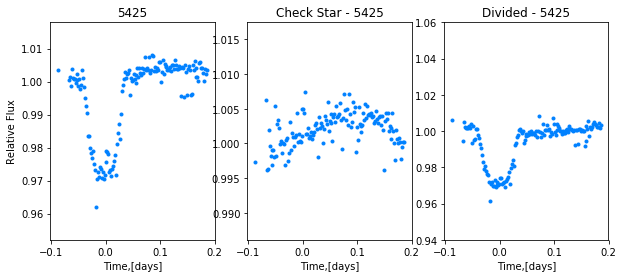

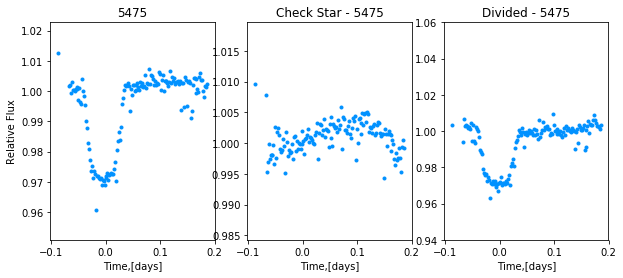

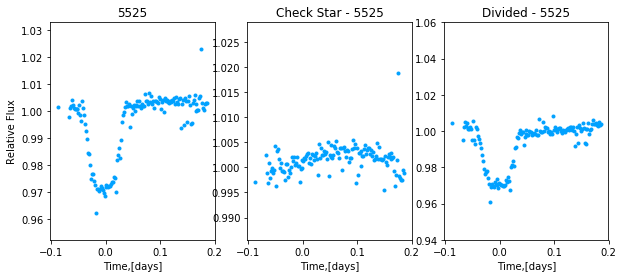

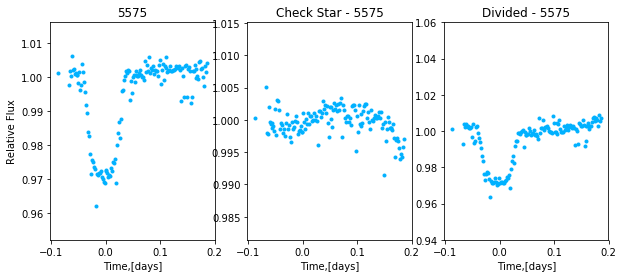

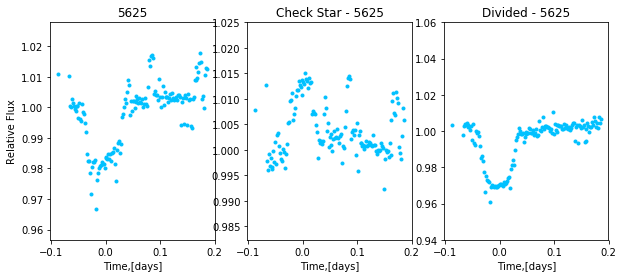

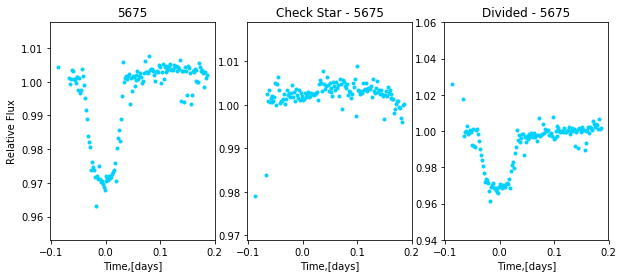

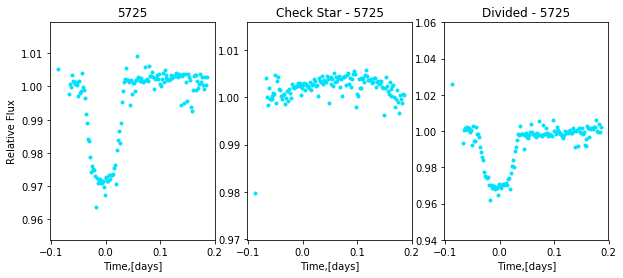

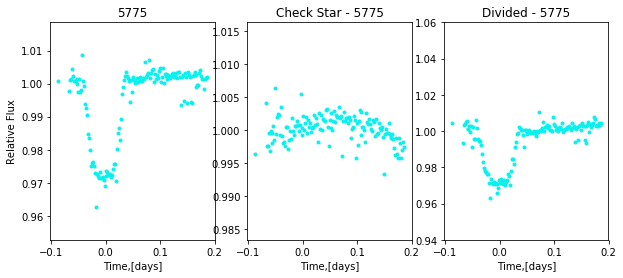

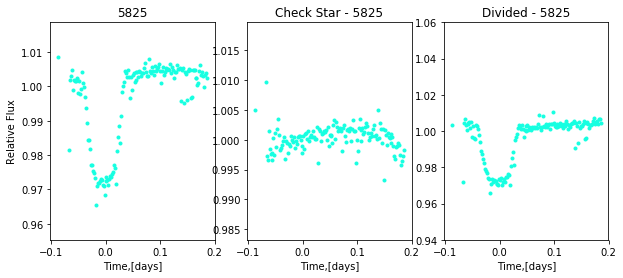

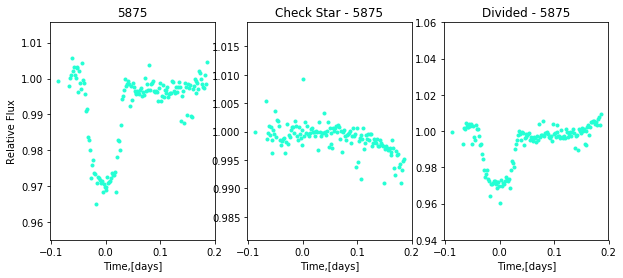

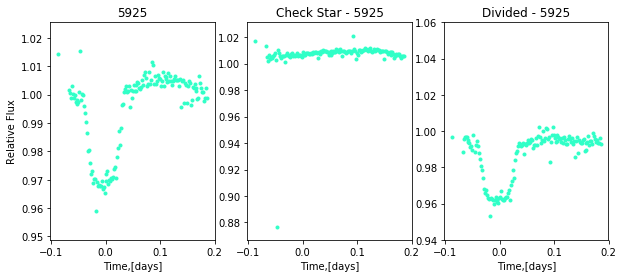

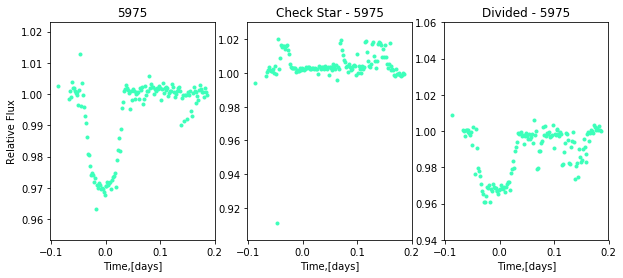

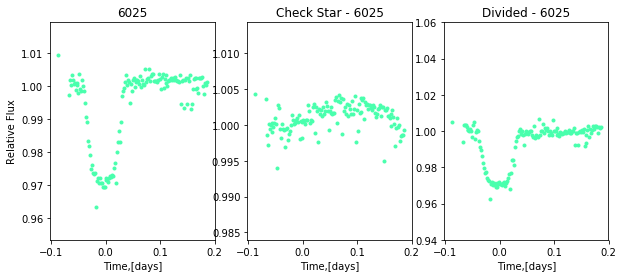

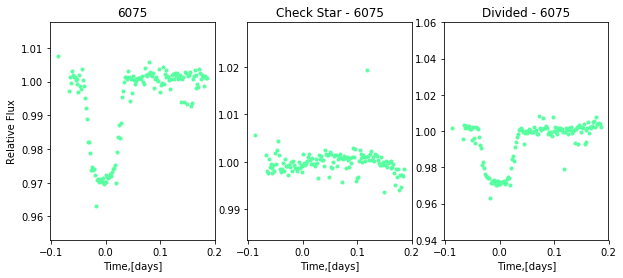

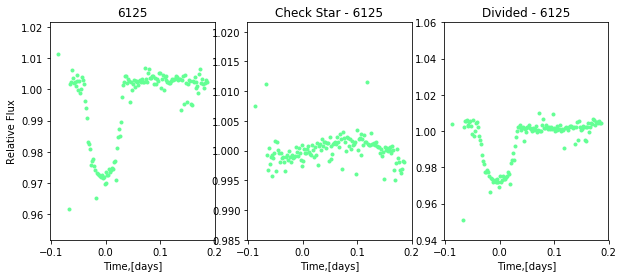

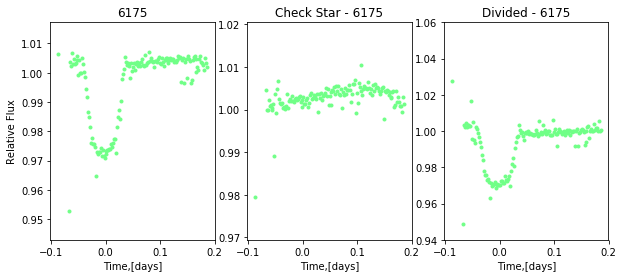

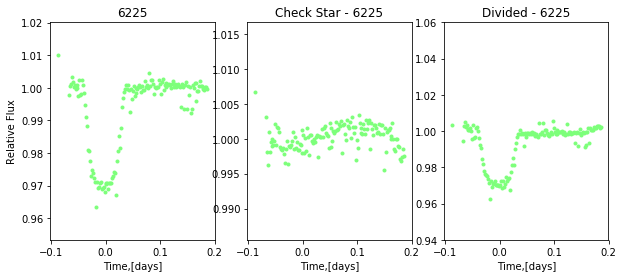

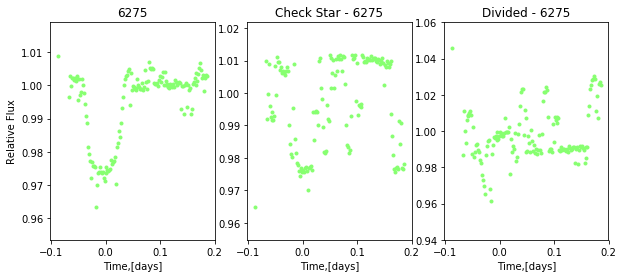

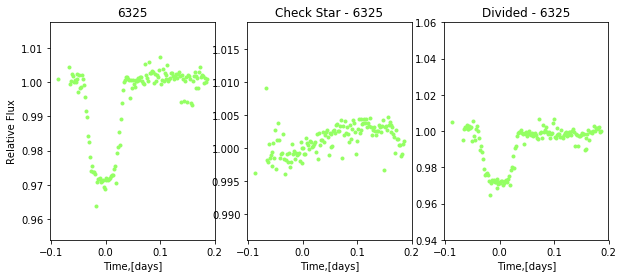

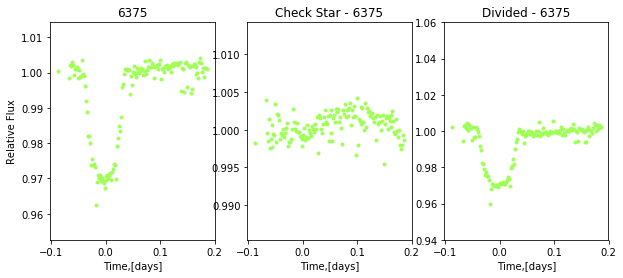

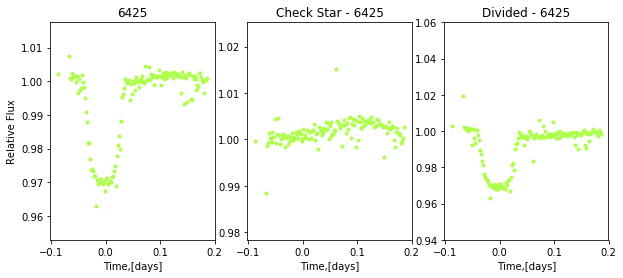

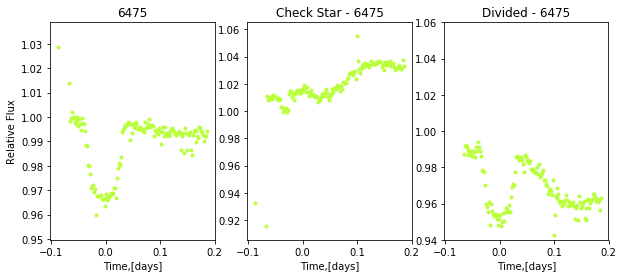

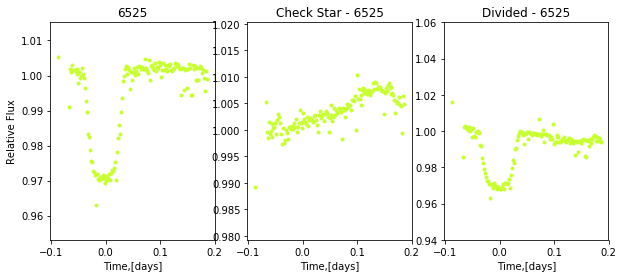

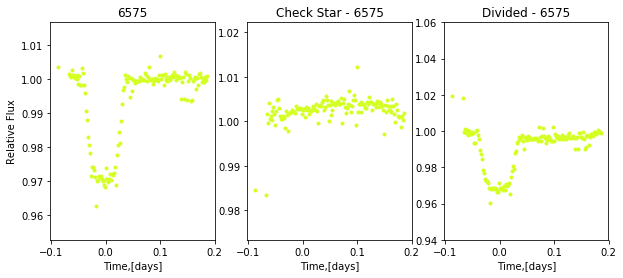

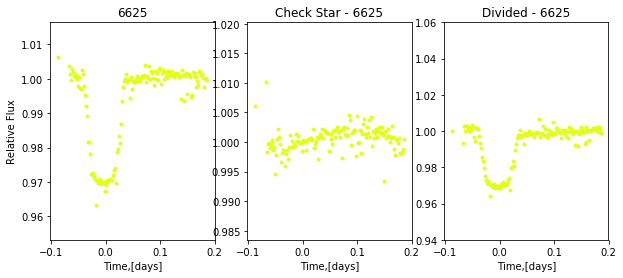

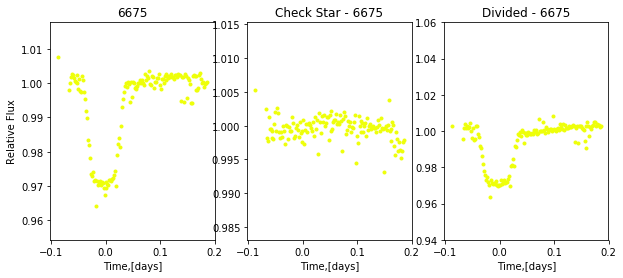

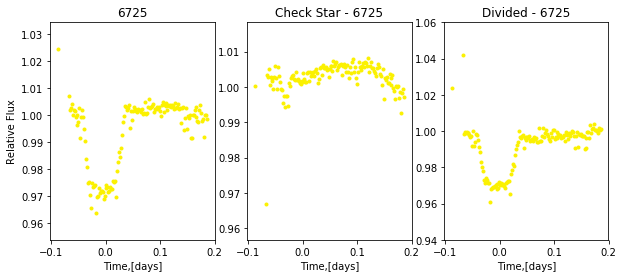

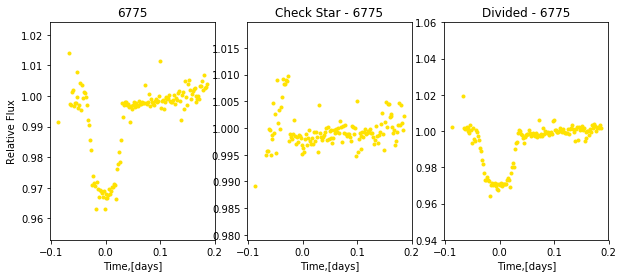

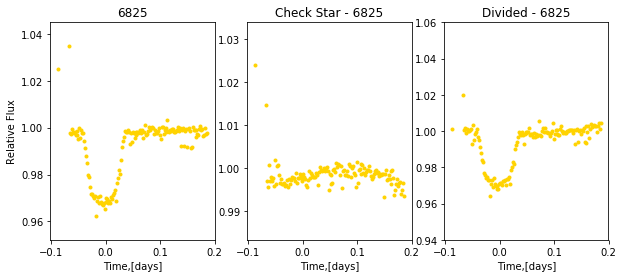

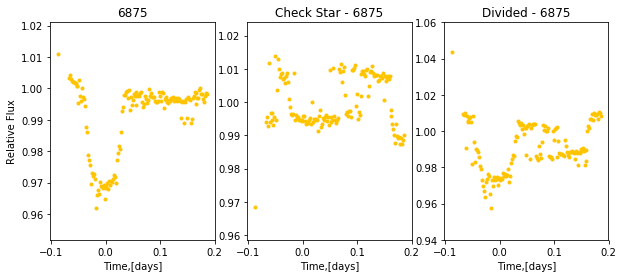

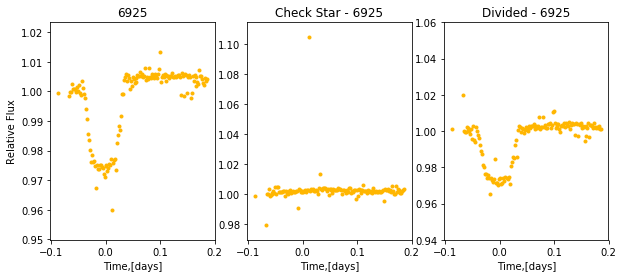

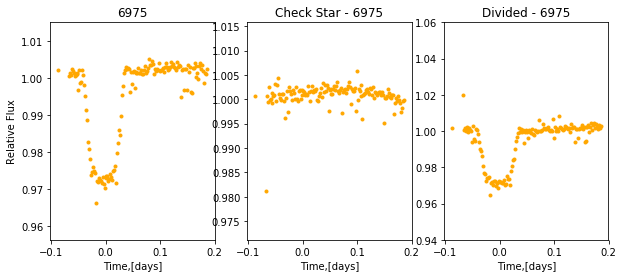

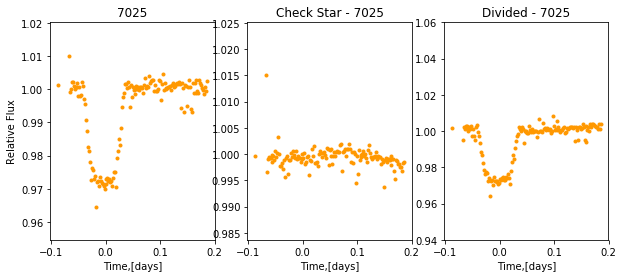

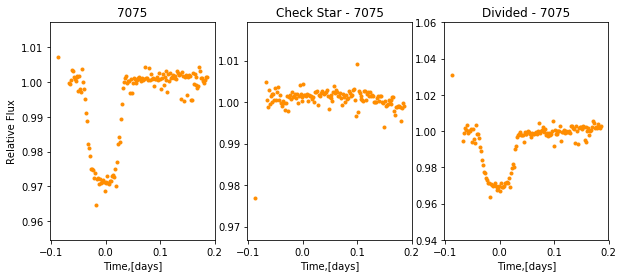

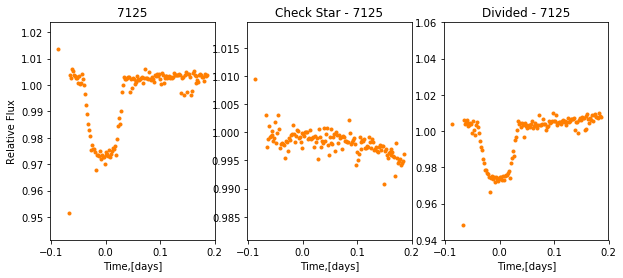

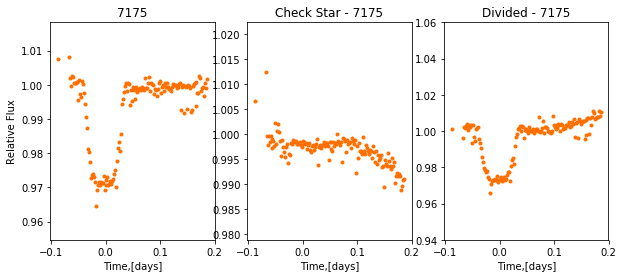

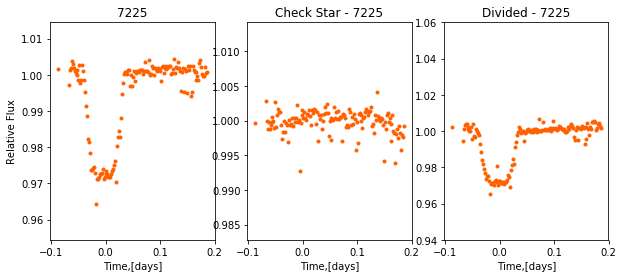

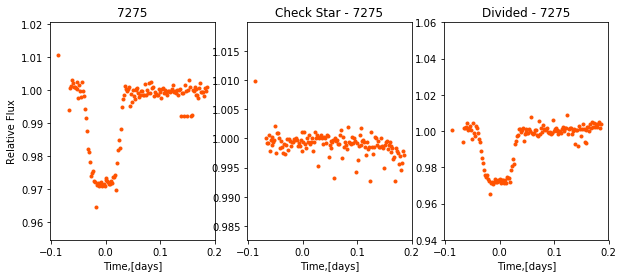

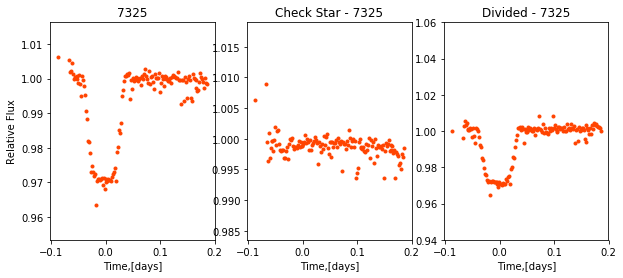

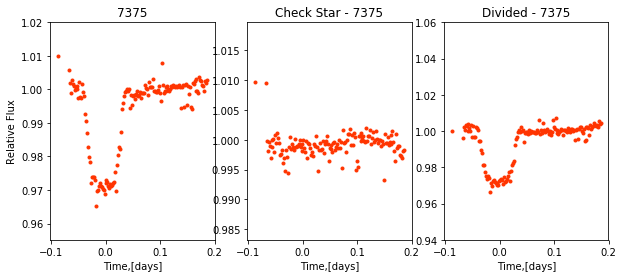

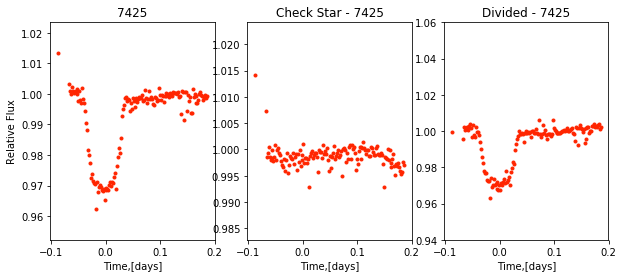

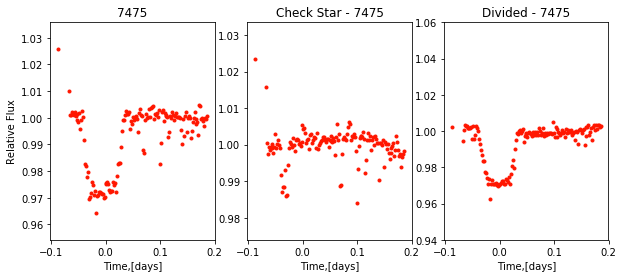

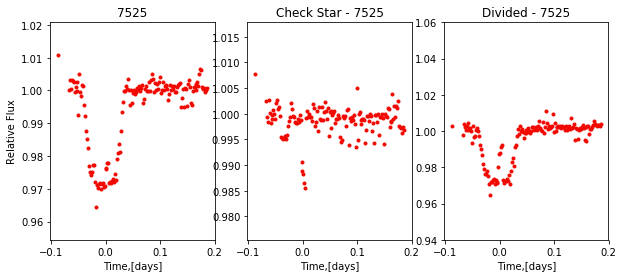

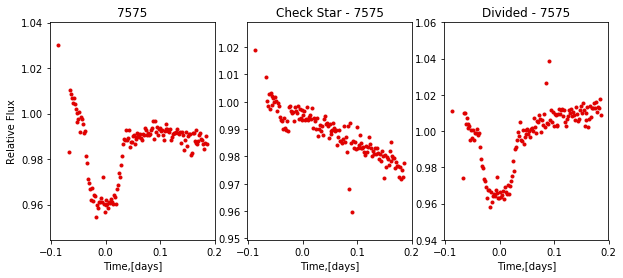

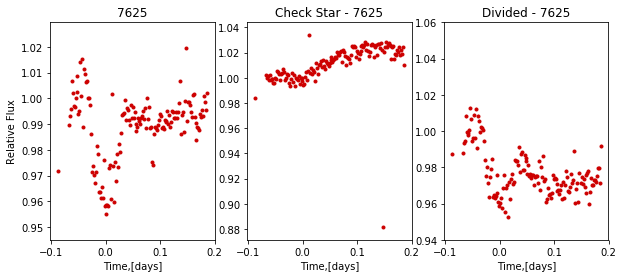

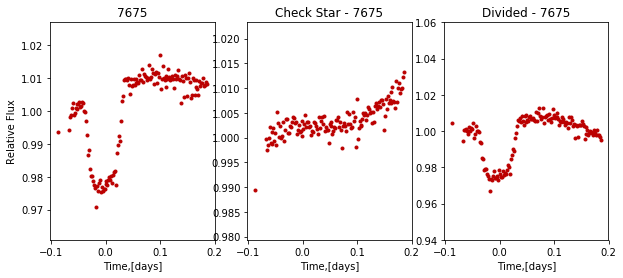

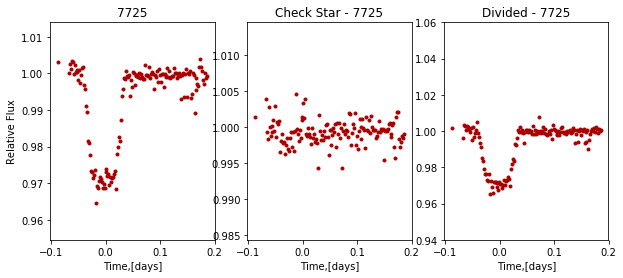

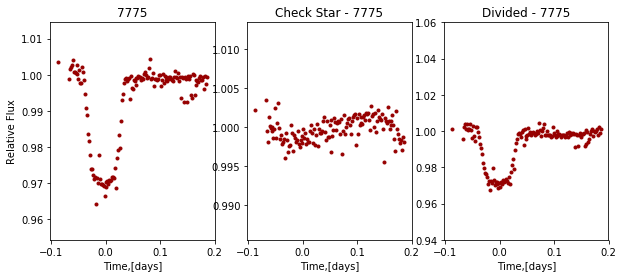

In [3]:
from GenerateLC import LCgen_binns,LCgen_white


corr=False
width=50

Cals_ind=[2,3,5,8]
csn=2

white=LCgen_white(SAVEPATH,corr,Cals_ind,csn)
binns=LCgen_binns(SAVEPATH,width,corr,Cals_ind,csn)

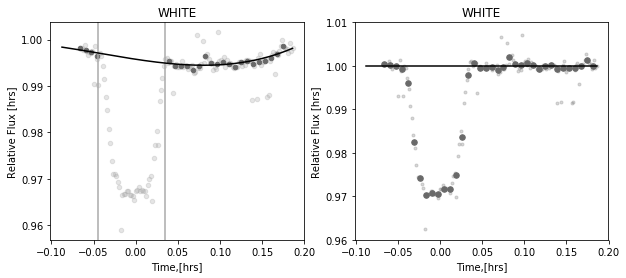

[ 4600.  4800.  5000.  5200.  5400.  5600.  5800.  6000.  6200.  6400.
  6600.  6800.  7000.  7200.  7400.  7600.  7800.  8000.  7800.]


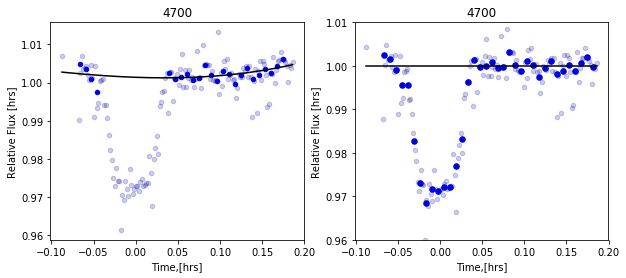

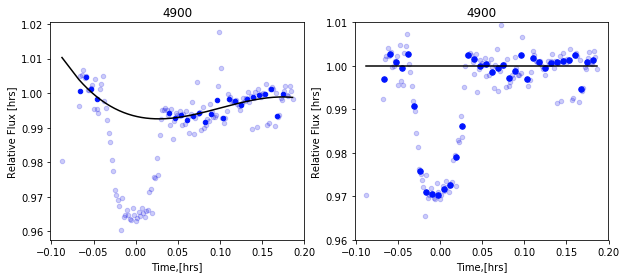

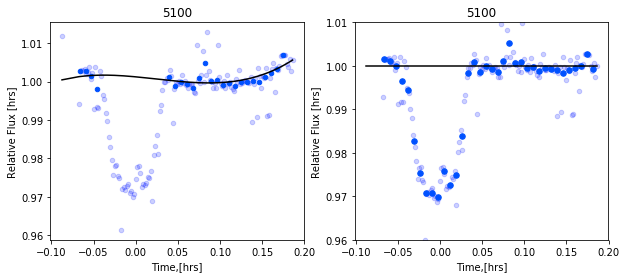

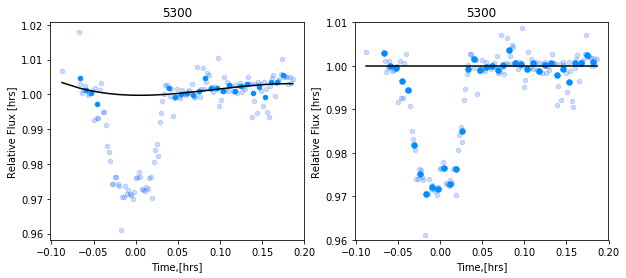

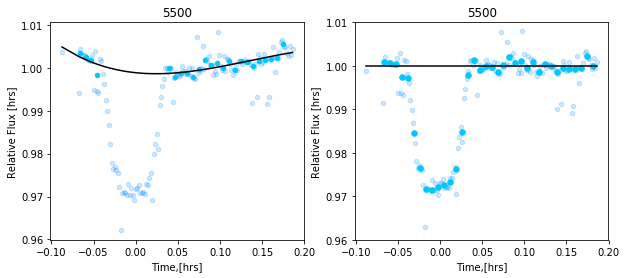

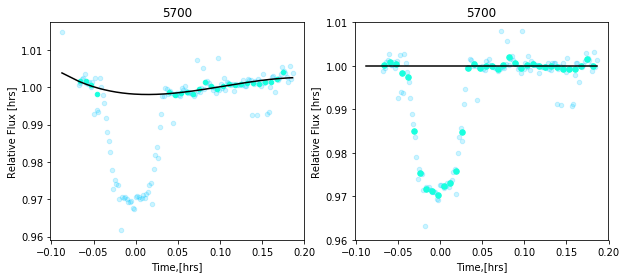

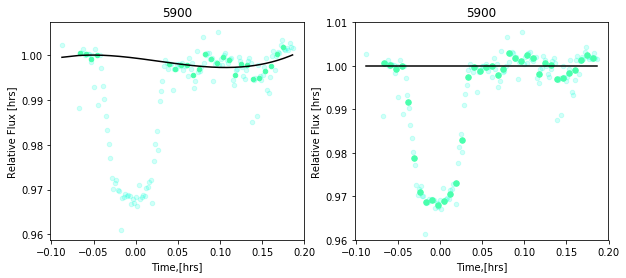

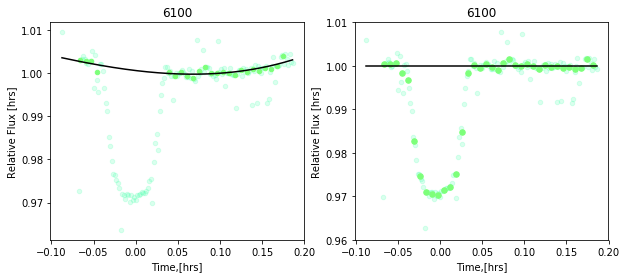

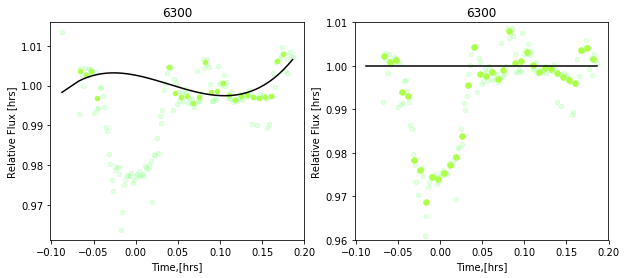

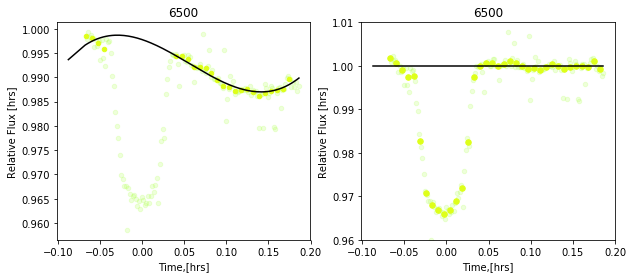

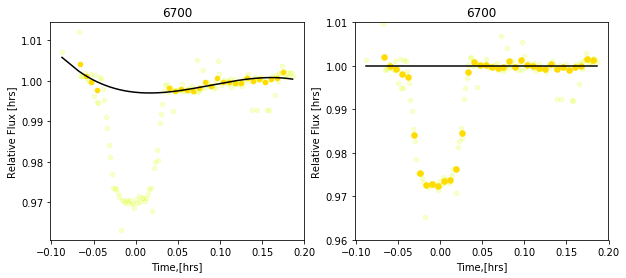

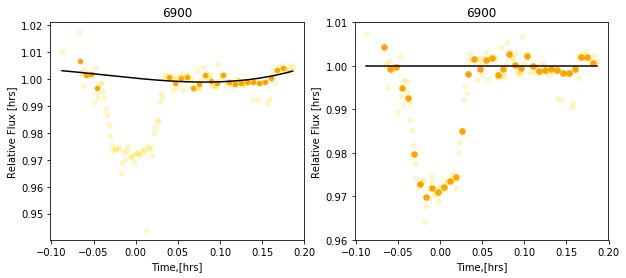

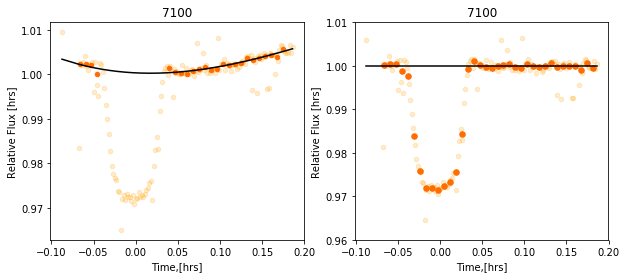

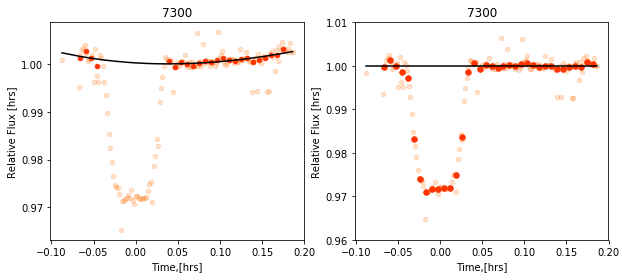

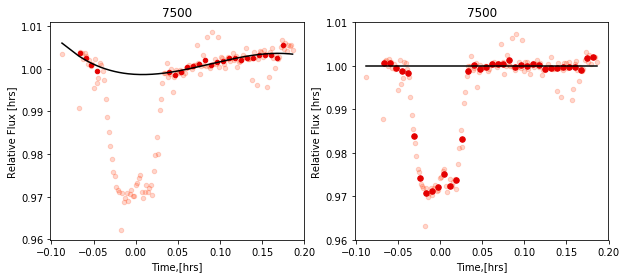

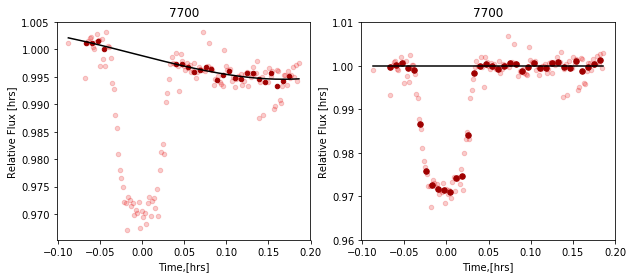

In [4]:
#Hats8 transit 1--- -0.05, 0.06
#W52 transit 1 --- -0.045, 0.035
#W52 transit 2 -- 
from BaselineFitting import blfit_binns,blfit_white

order=3         # polynomial order (in time)
avg=4           # number of points to average together
olow=0.94       # outlier - low end
ohigh=1.02      # outlier - high end
ybot=0.96       # ylim - low end (plot)
ytop=1.01       # ylim - high end (plot)

timein=-0.045
timeeg=0.035

corr=False
width=200


white=blfit_white(SAVEPATH,order,avg,olow,ohigh,ybot,ytop,timein,timeeg,corr)
binns=blfit_binns(SAVEPATH,width,order,avg,olow,ohigh,ybot,ytop,timein,timeeg,corr)

In [2]:
from LCfit import lcfit

width=200
corr=False
avg=False
nwalkers=500
burnin=500
nsteps=500
color=0   #0=white, 1=bins

white=lcfit(SAVEPATH,width,corr,avg,nwalkers,burnin,nsteps,0)
binns=lcfit(SAVEPATH,width,corr,avg,nwalkers,burnin,nsteps,1)

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


['/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py', '-f', '/Users/ermay/Library/Jupyter/runtime/kernel-accf6c3e-4ff4-4e94-a31f-3ca850cabc20.json']
>>>>>>>>>> WHITE LIGHT CURVE <<<<<<<<<<
('>>>>>>>>>> WAVELENGTH BIN: ', 4700.0, ' <<<<<<<<<<')
('>>>>>>>>>> WAVELENGTH BIN: ', 4900.0, ' <<<<<<<<<<')
('>>>>>>>>>> WAVELENGTH BIN: ', 5100.0, ' <<<<<<<<<<')
emcee: Exception while calling your likelihood function:
  params: [ 0.18333595  0.54201799  0.47902909]
  args: (array([ 0.16526261,  0.73591604,  0.06679434]), <batman.transitmodel.TransitParams object at 0x117c6d410>, <batman.transitmodel.TransitModel instance at 0x117c7aef0>, array([ -8.75092593e-02,  -6.75740741e-02,  -6.58101852e-02,
        -6.40266204e-02,  -6.22500000e-02,  -6.04745370e-02,
        -5.86979167e-02,  -5.69189815e-02,  -5.51412037e-02,
        -5.33622685e-02,  -5.15833333e-02,  -4.98067130e-02,
        -4.80347222e-02,  -4.62627315e-02,  -4.44918981e-02,


Traceback (most recent call last):
  File "/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "LCfit.py", line 107, in lnprob
    prior=lnprior(SAVEPATH,theta,initial,color)
  File "LCfit.py", line 66, in lnprior
    sys.path.insert(0,SAVEPATH)
KeyboardInterrupt


KeyboardInterrupt: 